<a href="https://colab.research.google.com/github/fayzi-dev/machin_learning/blob/main/Ethereum_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import library

In [1]:
!pip install imblearn

In [2]:
!pip install xgboost

In [3]:
!pip install blinker --upgrade --ignore-installed

#!pip install blinker==1.4

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)


In [4]:
!pip install pycaret

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report

import pickle

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/transaction_dataset.csv", index_col=0)
df.sample(5)

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
8192,531,0x3bd49b98ffcc5f717eed0c9e78a276ae979de6e4,1,0.00,487.53,68430.67,1,6,0,6,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,2.0,,GSENetwork
4863,1931,0x80ed5b6a64d8d149b2ea587898326b8cef5c4817,0,162.22,0.33,325.10,2,2,0,2,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0,0
8142,481,0x3681828da105fc3c44e212f6c3dc51a0a5a6f5c6,1,6344.30,571.80,302538.55,43,52,0,44,...,0.0,1275493.0,6.760609e+04,0.0,0.0,0.0,25.0,44.0,Populous,OmiseGO
2405,2406,0x3e92d516df53f6e37d1ba6aebd62abf43f958277,0,247.38,15296.34,481360.63,29,31,0,2,...,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0,0
6450,3518,0xac0381ecb389f46380174a96b1cc98faba7ff5ec,0,3731.14,5848.88,972422.52,107,98,0,54,...,0.0,25656553.0,1.954194e+06,0.0,0.0,0.0,16.0,50.0,ZRX,Kin


In [7]:
df.shape

(9841, 50)

In [46]:
from pycaret.classification import *

In [47]:
setup(df, target="FLAG", session_id=85)

,Description,Value
0,Session id,85
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9841, 17)"
4,Transformed data shape,"(9841, 17)"
5,Transformed train set shape,"(6888, 17)"
6,Transformed test set shape,"(2953, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [48]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9845,0.9974,0.9501,0.9790,0.9643,0.9544,0.9546,1.9770
xgboost,Extreme Gradient Boosting,0.9826,0.9971,0.9449,0.9757,0.9600,0.9489,0.9491,0.6580
rf,Random Forest Classifier,0.9765,0.9956,0.9193,0.9731,0.9454,0.9304,0.9311,1.8910
gbc,Gradient Boosting Classifier,0.9747,0.9955,0.9278,0.9568,0.9420,0.9259,0.9261,3.0030
et,Extra Trees Classifier,0.9710,0.9932,0.8990,0.9677,0.9320,0.9136,0.9147,0.5510
dt,Decision Tree Classifier,0.9617,0.9463,0.9187,0.9095,0.9139,0.8893,0.8894,0.2240
ada,Ada Boost Classifier,0.9583,0.9878,0.8970,0.9135,0.9050,0.8783,0.8785,1.1790
knn,K Neighbors Classifier,0.8904,0.9071,0.7167,0.7730,0.7433,0.6738,0.6749,0.2340
lr,Logistic Regression,0.8346,0.8036,0.2642,0.9623,0.4132,0.3518,0.4529,1.4990
svm,SVM - Linear Kernel,0.7824,0.5977,0.2123,0.7986,0.2853,0.2066,0.2995,0.1430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=85, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

In [12]:
df.select_dtypes(include=['float', 'int']).describe()


,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.00

In [13]:
df['FLAG'].value_counts()

,count
FLAG,
0,7662
1,2179


In [14]:
df['FLAG'].value_counts(normalize=True) * 100

,proportion
FLAG,
0,77.857941
1,22.142059


In [15]:
#import plotly.express as px

# Count the values of FLAG and convert to a DataFrame
flag_counts = df['FLAG'].value_counts().reset_index()
flag_counts.columns = ['FLAG', 'Count']

# Create the pie chart
fig = px.pie(flag_counts, values='Count', names='FLAG',
             title="Target Distribution of Fraud or Not Fraud",
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()


In [16]:
print(f'Percentage of non-fraudulent instances : {len(df.loc[df["FLAG"]==0])/ len(df["FLAG"]) * 100}')
print(f'Percentage of fraudulent instances : {len(df.loc[df["FLAG"]==1])/ len(df["FLAG"]) * 100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


# Datta Cleaning

In [17]:
df.isnull().sum()

,0
Index,0
Address,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0
Unique Received From Addresses,0


In [18]:
df.columns

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

In [19]:
df.drop([' ERC20 most sent token type', ' ERC20_most_rec_token_type'], axis=1, inplace=True)

In [20]:
df.columns

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

In [21]:
df.drop(['Index', 'Address'], axis=1, inplace=True)

In [22]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [23]:
df.isnull().sum()

,0
FLAG,0
Avg min between sent tnx,0
Avg min between received tnx,0
Time Diff between first and last (Mins),0
Sent tnx,0
Received Tnx,0
Number of Created Contracts,0
Unique Received From Addresses,0
Unique Sent To Addresses,0
min value received,0


In [24]:
#  Filterings the features with 0 variance
no_var = df.var() == 0
df.var()[no_var]

,0
ERC20 avg time between sent tnx,0.0
ERC20 avg time between rec tnx,0.0
ERC20 avg time between rec 2 tnx,0.0
ERC20 avg time between contract tnx,0.0
ERC20 min val sent contract,0.0
ERC20 max val sent contract,0.0
ERC20 avg val sent contract,0.0


In [25]:
# Frop Features with 0 variance ---- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis=1, inplace=True)
print(df.var())

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [26]:
df.shape

(9841, 39)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841 non-

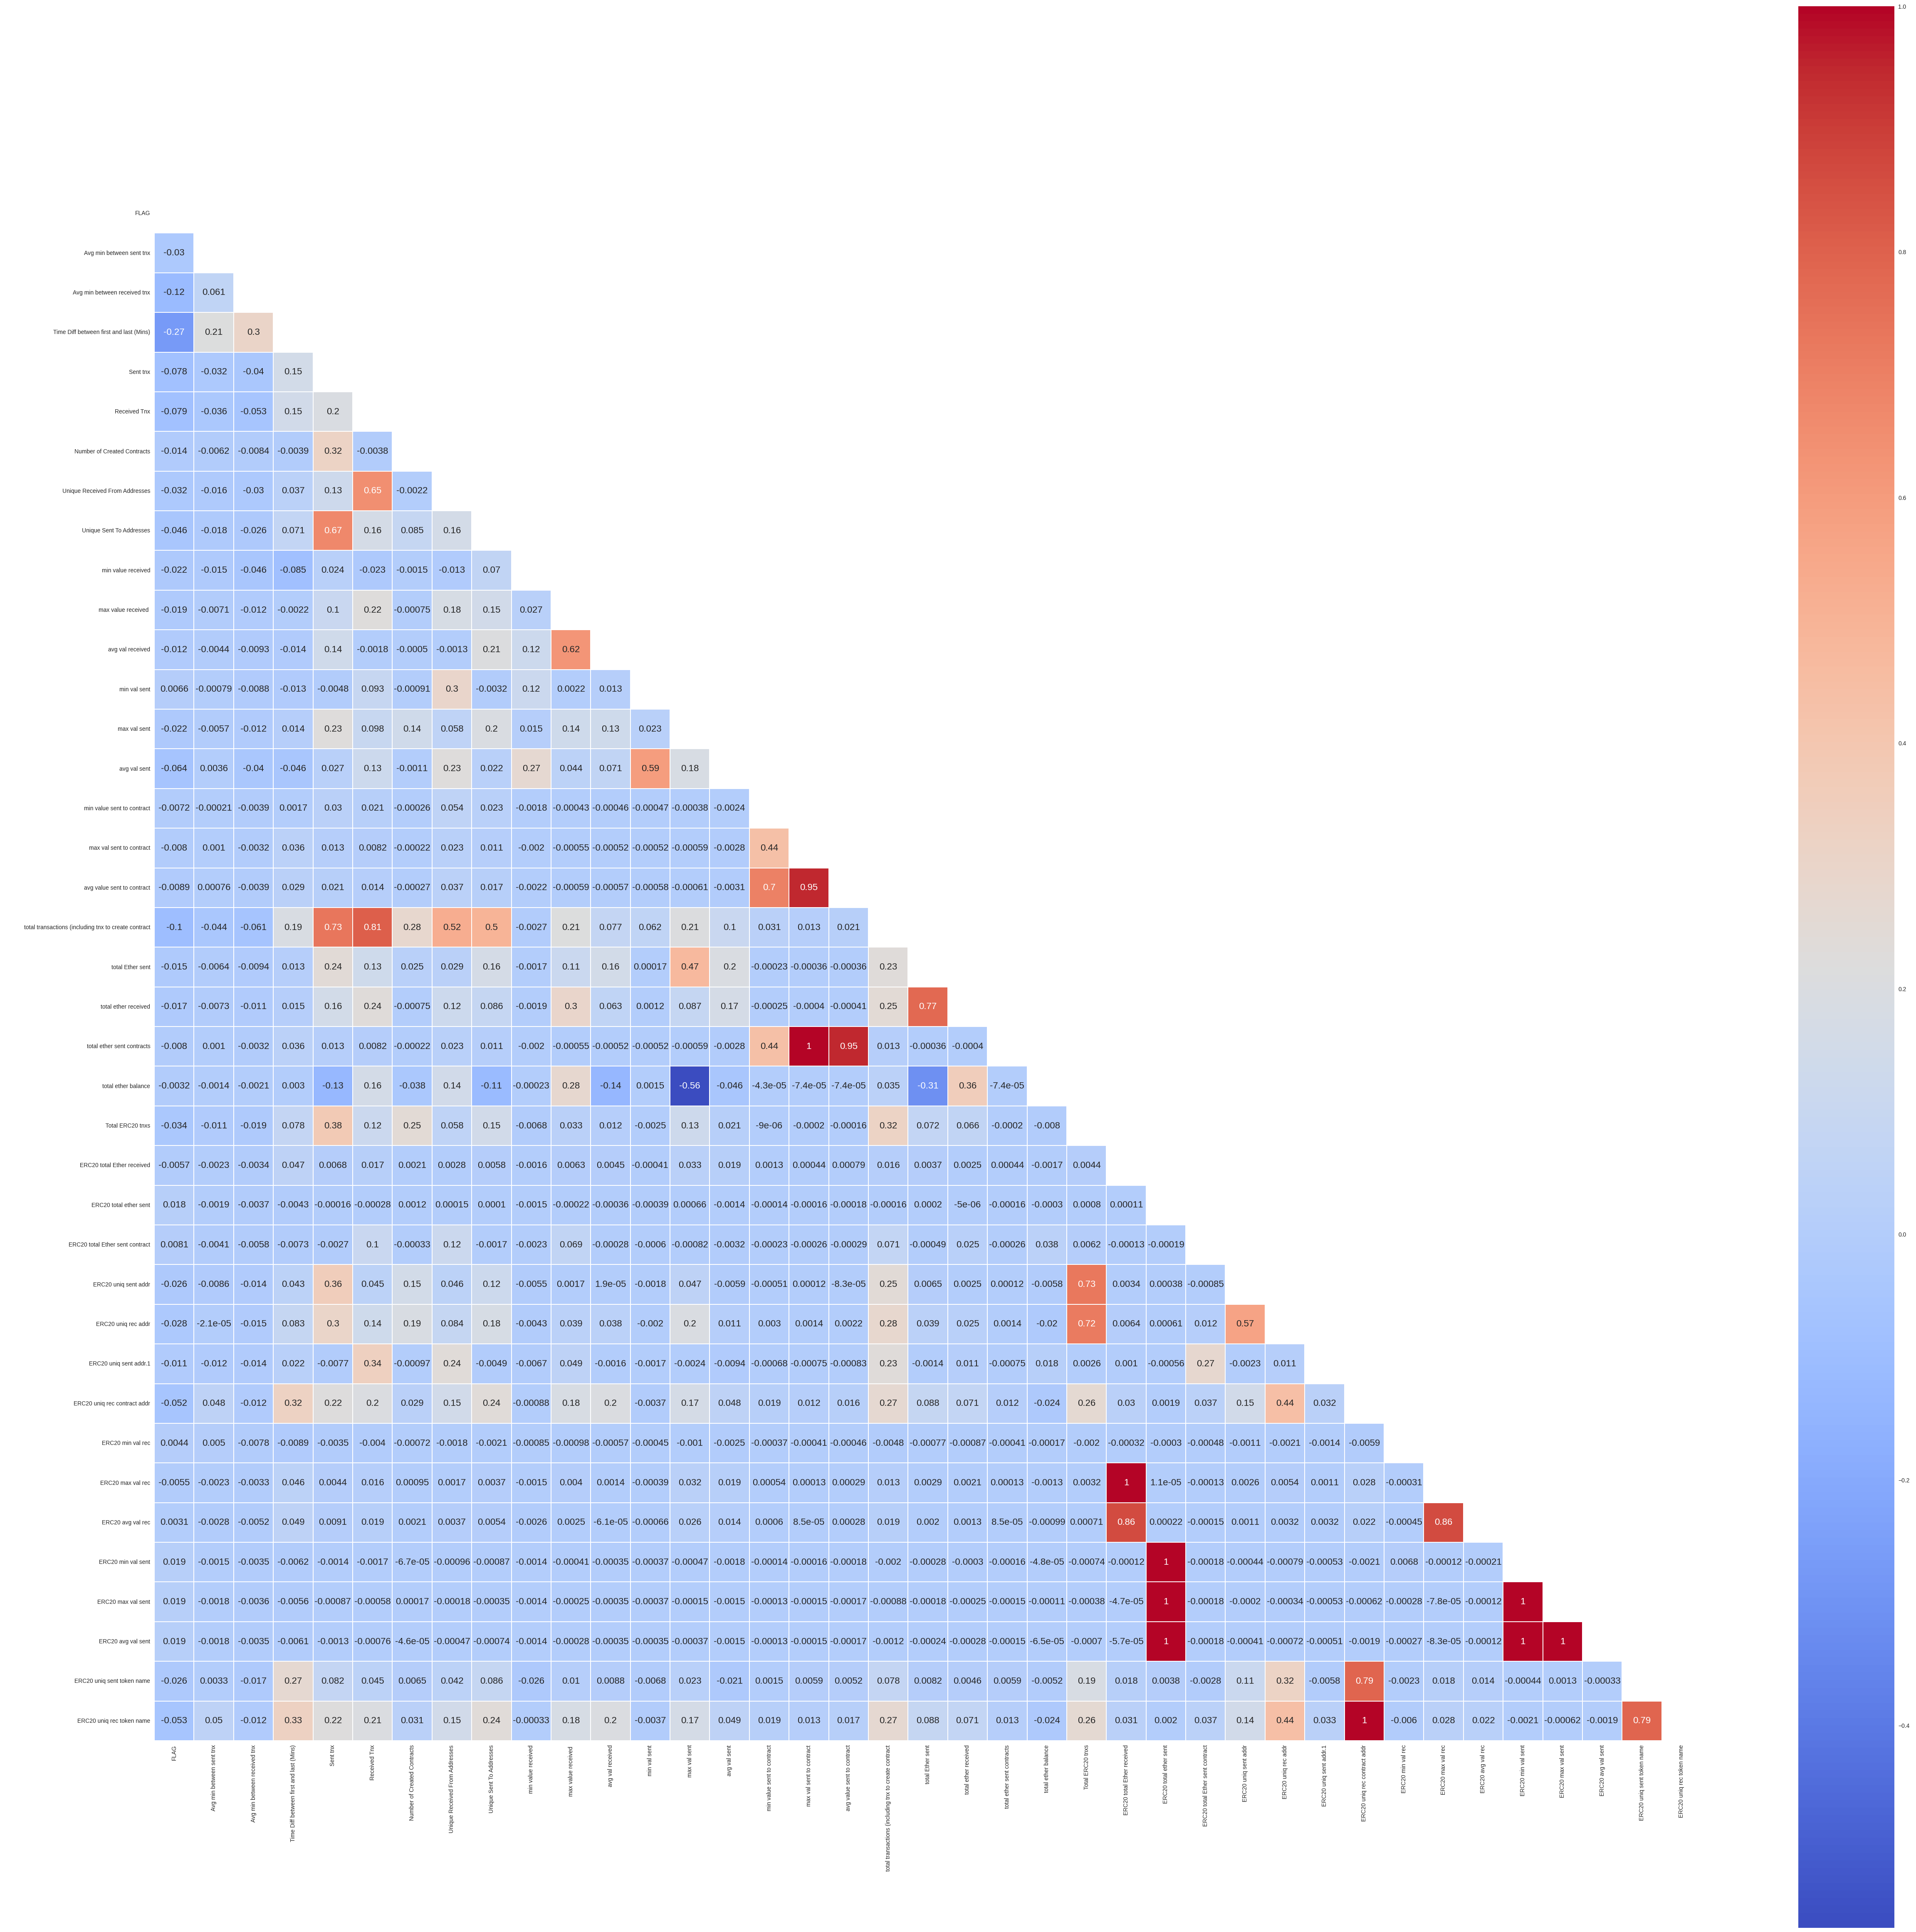

In [28]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(60,60))
  sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.1, square=True, annot_kws={'size':16})

In [29]:
sort_corr = corr.sort_values(by=['FLAG'], key=abs)

In [30]:
sort_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,0.002511,-0.000061,-0.000663,0.026083,0.014381,0.000598,0.000085,0.000276,0.018801,0.001952,0.001261,0.000085,-0.000991,0.000705,0.859823,0.000219,-0.000154,0.001146,0.003159,0.003207,0.021501,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022273
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,0.278315,-0.135682,0.001514,-0.564872,-0.045534,-0.000043,-0.000074,-0.000074,0.034828,-0.313816,0.356882,-0.000074,1.000000,-0.007995,-0.001737,-0.000301,0.037944,-0.005755,-0.019831,0.018368,-0.023787,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023809
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,-0.000976,-0.000566,-0.000446,-0.001008,-0.002499,-0.000372,-0.000412,-0.000458,-0.004837,-0.000766,-0.000866,-0.000412,-0.000170,-0.001969,-0.000322,-0.000297,-0.000477,-0.001089,-0.002115,-0.001367,-0.005930,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.006013
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,0.004034,0.001390,-0.000393,0.031664,0.019070,0.000541,0.000133,0.000294,0.013386,0.002944,0.002064,0.000133,-0.001251,0.003187,0.999967,0.000011,-0.000125,0.002649,0.005393,0.001051,0.027598,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028497
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,0.006272,0.004508,-0.000406,0.032925,0.019435,0.001257,0.000442,0.000791,0.015631,0.003749,0.002532,0.000442,-0.001737,0.004378,1.000000,0.000113,-0.000132,0.003380,0.006393,0.001031,0.030039,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030934
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,0.002239,0.012988,1.000000,0.022662,0.594868,-0.000468,-0.000519,-0.000577,0.062200,0.000166,0.001171,-0.000519,0.001514,-0.002451,-0.000406,-0.000389,-0.000600,-0.001774,-0.001966,-0.001735,-0.003749,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003728
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,0.053946,0.023183,-0.001820,-0.000427,-0.000457,-0.000468,-0.000378,-0.002445,1.000000,0.436849,0.696789,0.030868,-0.000226,-0.000252,0.436852,-0.000043,-0.000009,0.001257,-0.000143,-0.000234,-0.000514,0.002986,-0.000678,0.018886,-0.000372,0.000541,0.000598,-0.000144,-0.000134,-0.000134,0.001533,0.019304
max val sent to contract,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,-0.000550,-0.000516,-0.000519,-0.000594,-0.002764,0.436849,1.000000,0.949607,0.013137,-0.000356,-0.000400,1.000000,-0.000074,-0.000201,0.000442,-0.000165,-0.000259,0.000121,0.001416,-0.000750,0.012325,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.0059

In [31]:
corr['min val sent']

,min val sent
FLAG,0.006626
Avg min between sent tnx,-0.000789
Avg min between received tnx,-0.008761
Time Diff between first and last (Mins),-0.013107
Sent tnx,-0.004846
Received Tnx,0.093448
Number of Created Contracts,-0.000913
Unique Received From Addresses,0.296240
Unique Sent To Addresses,-0.003166
min value received,0.117682


In [32]:
drop = ['total transactions (including tnx to create contract',
     'total ether sent contracts',
     ' ERC20 avg val rec',
     ' ERC20 max val rec',
     ' ERC20 min val rec',
     ' ERC20 uniq rec contract addr',
     'max val sent',
     ' ERC20 avg val sent',
     ' ERC20 max val sent',
     ' ERC20 min val sent',
     ' Total ERC20 tnxs',
     'avg value sent to contract',
     'Unique Sent To Addresses',
     'Unique Received From Addresses',
     'total ether received',
     ' ERC20 uniq sent token name',
     'min value received',
     'min val sent',
     ' ERC20 uniq rec addr',
     ]

df.drop(drop, axis=1, inplace=True)

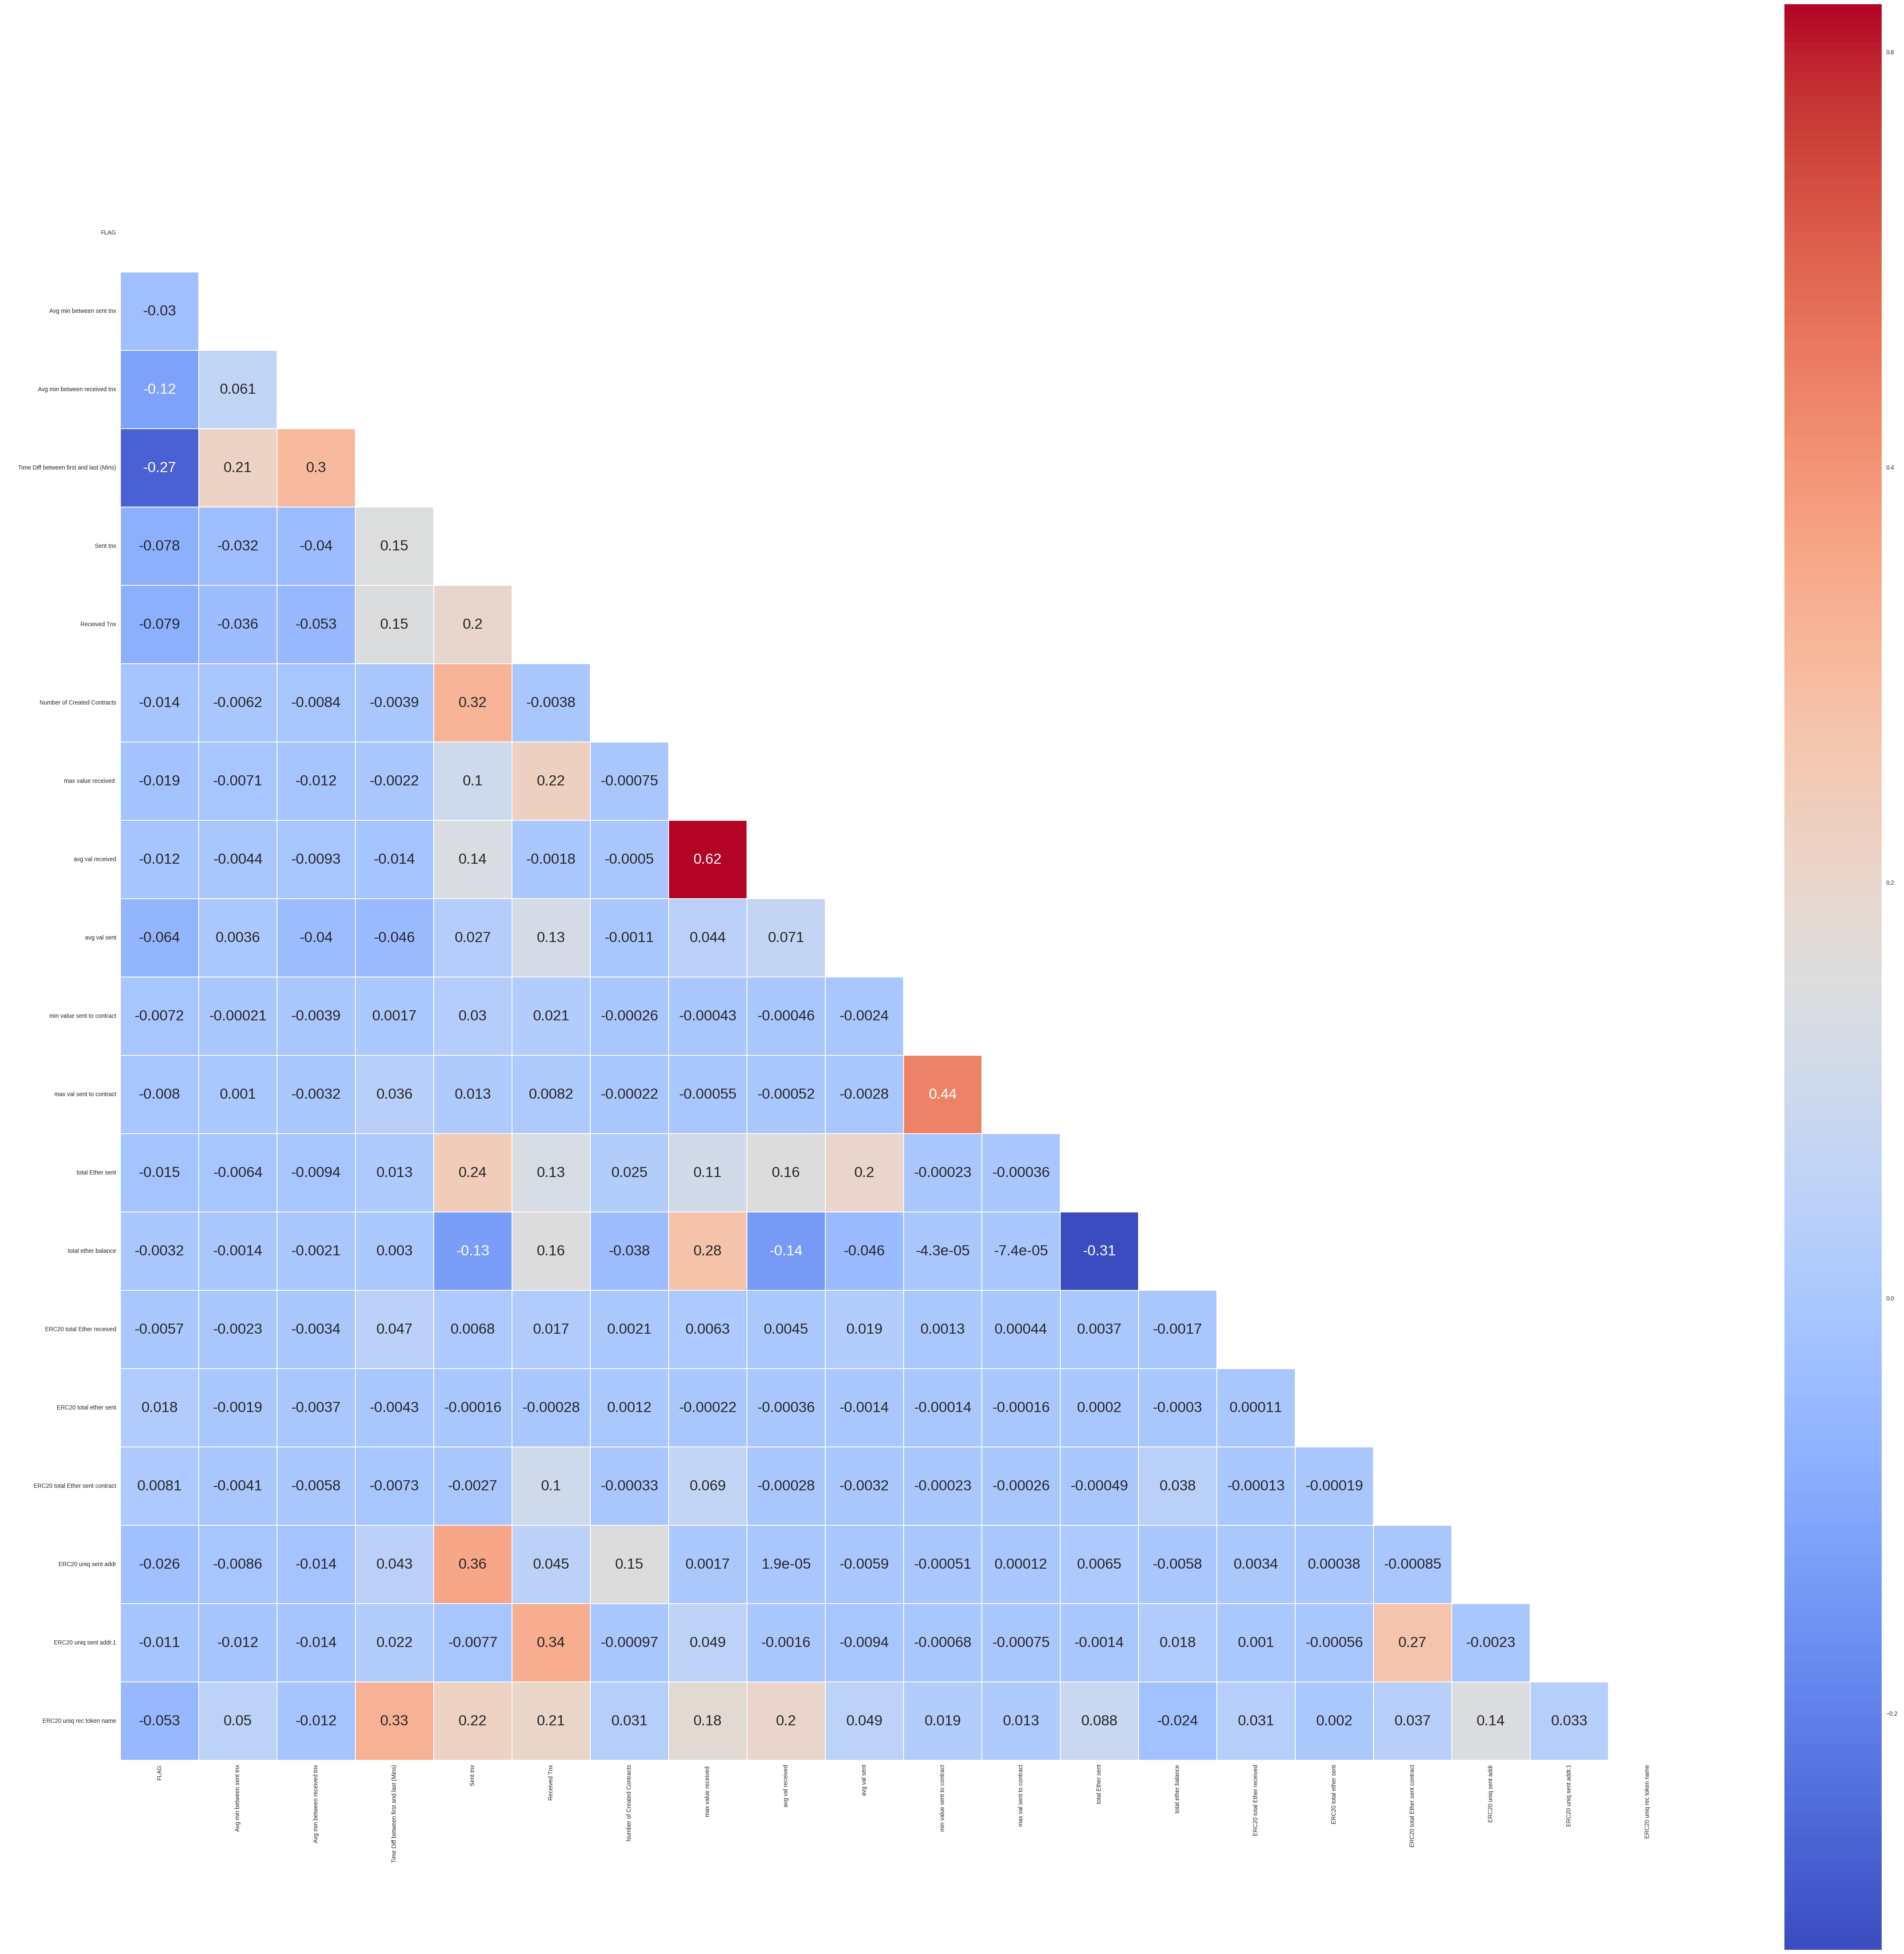

In [33]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(60,60))
  sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.1, square=True, annot_kws={'size':25})

In [34]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'max value received ',
       'avg val received', 'avg val sent', 'min value sent to contract',
       'max val sent to contract', 'total Ether sent', 'total ether balance',
       ' ERC20 total Ether received', ' ERC20 total ether sent',
       ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec token name'],
      dtype='object')

# Drop Features that are mosty : 0

In [35]:
# Some features present a small distrbution
for i in df.columns[1:]:
  if len(df[i].value_counts()) < 10:
    print(f'the column {i} has the following distrbution: \n{df[i].value_counts()}')
    print('================')

the column min value sent to contract has the following distrbution: 
min value sent to contract
0.00    9839
0.02       1
0.01       1
Name: count, dtype: int64
the column max val sent to contract has the following distrbution: 
max val sent to contract
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: count, dtype: int64
the column  ERC20 uniq sent addr.1 has the following distrbution: 
 ERC20 uniq sent addr.1
0.0    9813
1.0      26
3.0       1
2.0       1
Name: count, dtype: int64


In [36]:
drops = ['min value sent to contract', ' ERC20 uniq sent addr.1','max val sent to contract']
df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(9841, 17)


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


# make the data ready for training

In [37]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [38]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [39]:
X_train

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
4886,4224.31,15322.04,1141794.73,119,42,0,125.017611,21.091836,8.420149,1001.997727,-116.140623,3.952977e+05,335200.1525,0.0,15.0,35.0
9098,0.00,0.00,0.00,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-12,0.0000,0.0,0.0,1.0
1109,15.88,394.63,563075.85,1363,1372,0,27.000000,0.278498,0.277128,377.725350,4.373288,0.000000e+00,0.0000,0.0,0.0,0.0
4766,0.00,19859.78,39719.55,0,2,1,0.998990,0.499495,0.000000,0.000000,0.998990,0.000000e+00,0.0000,0.0,0.0,0.0
4686,158.22,0.33,317.10,2,2,0,54.838452,50.500000,50.499508,100.999016,0.000984,0.000000e+00,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0.00,457.17,940.23,1,2,0,2.257062,1.678531,3.356037,3.356037,0.001025,1.000000e-12,0.0000,0.0,0.0,1.0
7763,1641.74,2103.12,327679.35,10,148,0,14.341000,1.429861,21.161505,211.615052,0.004326,2.095638e+03,0.0000,0.0,0.0,5.0
5218,0.00,0.00,64.67,1,1,0,0.174997,0.174997,0.172797,0.172797,0.002200,0.000000e+00,0.0000,0.0,0.0,0.0
1346,7470.96,8287.97,199029.10,10,15,0,2125.259250,146.984511,220.476327,2204.763269,0.004389,7.245763e+02,0.0000,0.0,0.0,4.0


In [40]:
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)

In [42]:
sc_df = pd.DataFrame(sc_train, columns=X_train.columns)
sc_df

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name
0,-0.038167,0.310581,2.851119,0.001530,-0.133464,-0.025638,-0.031784,-0.130116,-0.170156,-0.026374,-0.008354,-0.051039,-0.011875,-0.019294,0.125987,1.868394
1,-0.238842,-0.339707,-0.675810,-0.153323,-0.176780,-0.025638,-0.043658,-0.183336,-0.209762,-0.028905,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
2,-0.238088,-0.322958,1.063494,1.620329,1.238207,-0.025638,-0.041094,-0.182633,-0.208458,-0.027951,-0.007905,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
3,-0.238842,0.503169,-0.553119,-0.153323,-0.174717,-0.018987,-0.043563,-0.182076,-0.209762,-0.028905,-0.007917,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
4,-0.231326,-0.339693,-0.674831,-0.150720,-0.174717,-0.025638,-0.038450,-0.055912,0.027769,-0.028650,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.238842,-0.320304,-0.672906,-0.152022,-0.174717,-0.025638,-0.043444,-0.179100,-0.193976,-0.028896,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.217464
7868,-0.160852,-0.250448,0.336370,-0.140310,-0.024143,-0.025638,-0.042296,-0.179728,-0.110226,-0.028370,-0.007921,-0.052381,-0.012140,-0.019294,-0.058886,0.027931
7869,-0.238842,-0.339707,-0.675610,-0.152022,-0.175749,-0.025638,-0.043642,-0.182894,-0.208949,-0.028904,-0.007921,-0.052388,-0.012140,-0.019294,-0.058886,-0.278813
7870,0.116065,0.012046,-0.061022,-0.140310,-0.161310,-0.025638,0.158200,0.187543,0.827274,-0.023335,-0.007921,-0.052386,-0.012140,-0.019294,-0.058886,-0.033418


# SMOTE for OverSampling

In [51]:
over_sample = SMOTE()
print(f'Shape of the training befor SMOTE: {sc_train.shape, y_train.shape}')

Shape of the training befor SMOTE: ((7872, 16), (7872,))


In [52]:
x_train_resample , y_train_resample = over_sample.fit_resample(sc_train, y_train)
print(f'Shape of the training  ofter SMOTE: {x_train_resample.shape, y_train_resample.shape}')


Shape of the training  ofter SMOTE: ((12230, 16), (12230,))


In [53]:
# Target distribution befor SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
  if i == 0:
    non_fraud += 1
  else:
    fraud += 1


# Target distribution ofter SMOTE

no = 0
yes = 0

for j in y_train_resample:
  if j == 0:
    no += 1
  else:
    yes += 1




print(f'befor oversample \n \t non-fraud:{non_fraud} \n \t fraud: {fraud}')
print(f'ofter oversample \n \t non-fraud:{no} \n \t fraud: {yes}')

befor oversample 
 	 non-fraud:6115 
 	 fraud: 1757
ofter oversample 
 	 non-fraud:6115 
 	 fraud: 6115


# Logistic Regression

In [54]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train_resample, y_train_resample)

#  scaling test sets data
sc_test = sc.transform(X_test)

preds = lr.predict(sc_test)

In [55]:
print(y_test.shape)
y_test.value_counts()

(1969,)


,count
FLAG,
0,1547
1,422


In [60]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           0       0.94      0.54      0.69      1547
           1       0.34      0.87      0.49       422

    accuracy                           0.61      1969
   macro avg       0.64      0.71      0.59      1969
weighted avg       0.81      0.61      0.64      1969

[[837 710]
 [ 55 367]]


# Random Forest Classifier

In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resample, y_train_resample)
preds_rf = rf.predict(sc_test)

print(classification_report(y_test, preds_rf))
print(confusion_matrix(y_test, preds_rf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1517   30]
 [  22  400]]


# XGB Classifier

In [62]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_train_resample, y_train_resample)
preds_xgb = rf.predict(sc_test)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1517   30]
 [  22  400]]


# Hyperparameters tunong forXGB Classifier

In [63]:
param_grids = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200],
    'subsample': [0.5, 0.9],
    'max_depth': [3, 4],
    'colsample_bytree': [0.3, 0.7]
}

grid = GridSearchCV(estimator=xgb_c, param_grid=param_grids, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_train_resample, y_train_resample)

print(f' Best params found for XGBoost are :{grid.best_params_}')
print(f' Best recall obtatined by the best params :{grid.best_score_}')

 Best params found for XGBoost are :{'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.9}
 Best recall obtatined by the best params :0.9859279227239177


In [65]:
preds_best_xgb = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_xgb))
print(confusion_matrix(y_test, preds_best_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1547
           1       0.93      0.95      0.94       422

    accuracy                           0.97      1969
   macro avg       0.96      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969

[[1516   31]
 [  19  403]]


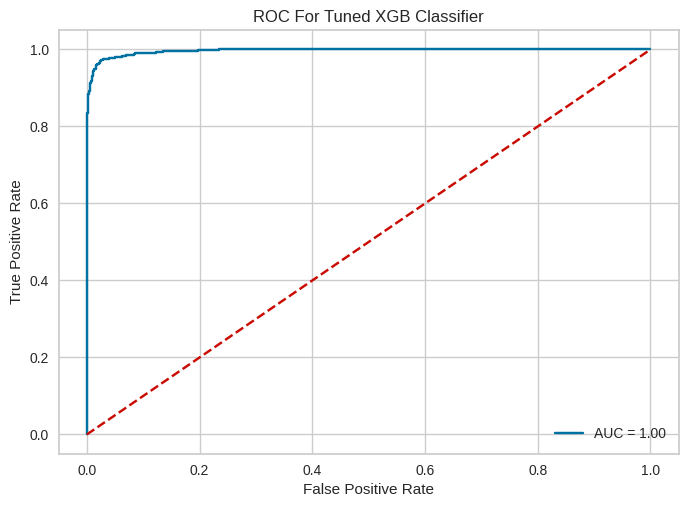

In [66]:
# Ploting AUC for untuned XGB Classifier
probs = xgb_c.predict_proba(sc_test)
pred = probs[:, 1]
fpr, tpr, threshhold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)


plt.title("ROC For Tuned XGB Classifier")
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()